In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
import torch
import matplotlib.pyplot as plt
from FittedModels.utils import plot_distributions
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.Guassian_FullCov import Guassian_FullCov
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager

# DReG

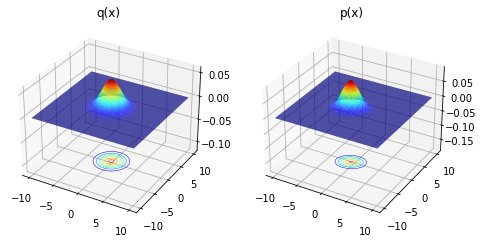

In [3]:
epochs = 20000
dim = 2
n_samples_estimation = int(1e4)
target = Guassian_FullCov(dim=dim)
learnt_sampler = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG", lr=1e-4)
fig_before = fig_before_train = plot_distributions(tester)
expectation_before, sampling_weights_before = tester.estimate_expectation()

loss: 0.15919658541679382, mean log p_x -3.360703468322754: 100%|███████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:45<00:00, 440.83it/s]


true expectation is -1.0906023979187012 
estimate before training is -1.0910708904266357 
estimate after training is -1.084303617477417 
effective sample size is 9709.6640625 
variance in weights is 2.990495906463053e-10


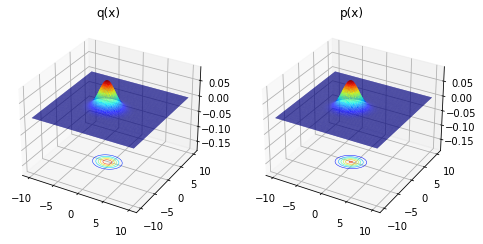

In [4]:
history = tester.train(epochs)
expectation, info = tester.estimate_expectation(n_samples_estimation)
true_expectation = torch.sum(tester.target_dist.mean)

print(f"true expectation is {true_expectation} \n"
      f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")
fig_after_train = plot_distributions(tester)

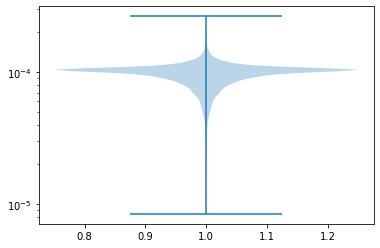

In [5]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

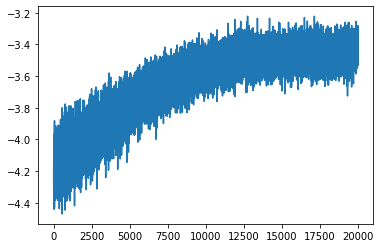

In [6]:
plt.plot(history["log_p_x"])

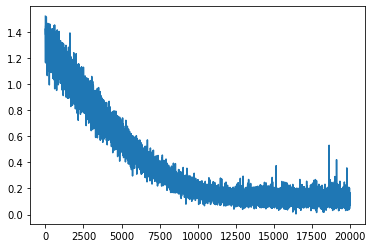

In [7]:
plt.plot(history["loss"])

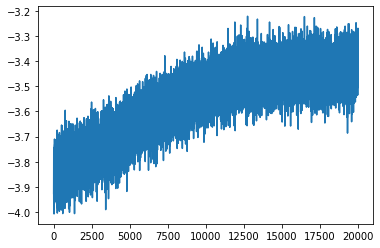

In [8]:
plt.plot(history["log_q_x"])

# KL

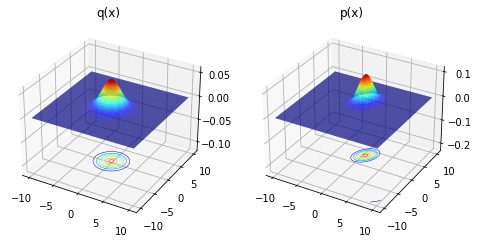

In [13]:
target = Guassian_FullCov(dim=dim)
learnt_sampler = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
fig_before = fig_before_train = plot_distributions(tester)
expectation_before, sampling_weights_before = tester.estimate_expectation()

loss: 0.029640858992934227, mean log p_x -3.1802215576171875: 100%|█████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:43<00:00, 457.82it/s]


true expectation is 3.307753562927246 
estimate before training is 3.3833742141723633 
estimate after training is 3.286487102508545 
effective sample size is 8820.1904296875 
variance in weights is 1.337761235120638e-09


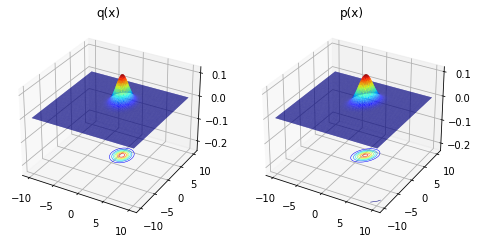

In [14]:
history = tester.train(epochs)
expectation, info = tester.estimate_expectation(n_samples_estimation)
true_expectation = torch.sum(tester.target_dist.mean)

print(f"true expectation is {true_expectation} \n"
      f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

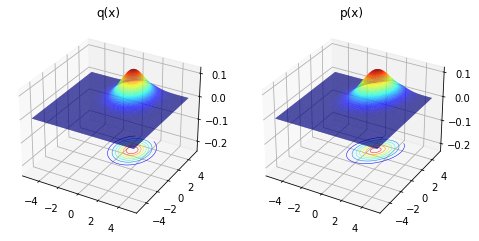

In [17]:
fig_after_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

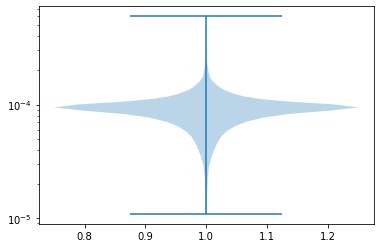

In [15]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

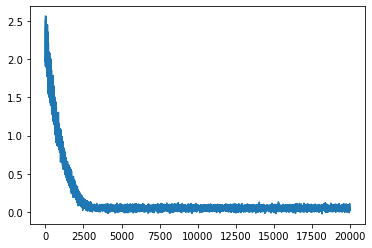

In [16]:
plt.plot(history["loss"])

# Annealed Importance Sampling

In [24]:
from ImportanceSampling.AnnealedImportanceSampler import AnnealedImportanceSampler

In [25]:
annealed_importance_sampler = AnnealedImportanceSampler(tester.learnt_sampling_dist, tester.target_dist)
expectation, info_dict = annealed_importance_sampler.calculate_expectation(n_samples=n_samples_estimation)

In [26]:
info_dict['effective_sample_size'] # so close to number of samples!

tensor(9665.7920)

In [27]:
info_dict.keys()

dict_keys(['effective_sample_size', 'normalised_sampling_weights'])

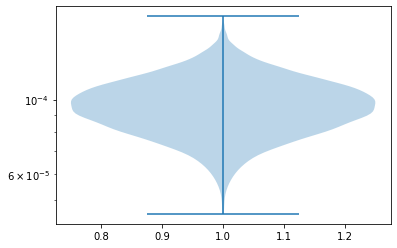

In [28]:
plt.violinplot([info_dict['normalised_sampling_weights']])
plt.yscale("log")